In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

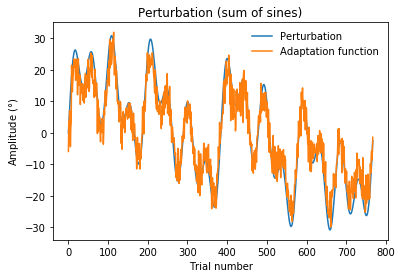

In [62]:
# let's create the perturbation, which is a sum of 5 different sine waves
k = np.array([1, 2, 4, 8, 16])
N = 768
n = np.linspace(0, N-1, N)
sine_in = np.zeros((len(k), N))
shifted_sinewave = np.zeros((len(k), N))

for i in range(len(k)):
    sine_in[i, :] = 10 * np.sin(2 * np.pi * k[i] * n / N)
    shifted_sinewave[i, 8:] = sine_in[i, 8:]
perturbation = sine_in.sum(axis=0)
y = 0.8 * shifted_sinewave.sum(axis=0) + 3.5 * np.random.randn(N)

# plot the perturbation
plt.plot(perturbation, label='Perturbation')
plt.xlabel('Trial number')
plt.ylabel('Amplitude ($\degree$)')
plt.title('Perturbation (sum of sines)');

# let's create something close to an ideal response
#y = perturbation + 3.5 * np.random.randn(N)
plt.plot(y, label='Adaptation function')
plt.legend(frameon=False);

Text(0, 0.5, 'Amplitude')

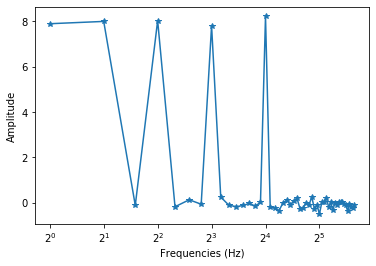

In [64]:
# we're going to regress the behavior onto sinusoids of every frequency up to N/2
# create design matrix
freqs = np.linspace(0, N/2-1, N//2)
X = np.zeros((N, len(freqs)))
for i in range(len(freqs)):
    X[:, i] = np.sin(2 * np.pi * freqs[i] * n / N)

# solve for optimal Beta
U, s, Vh = np.linalg.svd(X)
S_pound = linalg.diagsvd(1/s, X.shape[1], X.shape[0]) # must be same shape as S^T
Beta = Vh.T @ S_pound @ U.T @ y

# let's plot amplitudes of perturbed frequencies
plt.plot(freqs[1:51], Beta[1:51], marker='*')
plt.xscale('log', basex=2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Amplitude')

In [40]:
freqs

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [45]:
np.random.randint(10)

8